# Import Library

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Import

## Data Training

In [ ]:
trainData = pd.read_csv('/content/drive/MyDrive/Skripsi/Dataset/Google_train_data.csv')
trainData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,4.939940,5.096096,4.891391,5.072823,5.072823,633134232
1,2005-01-04,5.040040,5.078328,4.841842,4.867367,4.867367,549685764
2,2005-01-05,4.841091,4.927427,4.810561,4.842593,4.842593,329134536
3,2005-01-06,4.881882,4.902402,4.697698,4.718468,4.718468,415068516
4,2005-01-07,4.770771,4.861111,4.724224,4.851101,4.851101,386129484


In [ ]:
trainData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3768,2019-12-20,68.154999,68.199997,67.536499,67.560997,67.560997,50090000
3769,2019-12-23,67.936501,68.092499,67.400002,67.531502,67.531502,19936000
3770,2019-12-24,67.510498,67.600502,67.208504,67.221497,67.221497,13468000
3771,2019-12-26,67.327499,68.160004,67.275497,68.123497,68.123497,23662000
3772,2019-12-27,68.199997,68.352501,67.650002,67.732002,67.732002,23212000


## Data Testing

In [ ]:
testData = pd.read_csv('/content/drive/MyDrive/Skripsi/Dataset/Google_test_data.csv')
testData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
1,2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2,2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
3,2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
4,2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000


In [ ]:
testData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
687,2022-09-23,99.629997,99.660004,97.470001,98.739998,98.739998,31602900
688,2022-09-26,98.099998,99.879997,97.800003,98.169998,98.169998,27072700
689,2022-09-27,99.430000,100.000000,96.870003,97.500000,97.500000,30072800
690,2022-09-28,97.650002,100.699997,97.110001,100.050003,100.050003,32466300
691,2022-09-29,98.639999,98.639999,95.959999,97.419998,97.419998,31047200


# 2. Pre-processing Data

## Data Training

In [ ]:
trainData["Date"] = pd.to_datetime(trainData['Date'])
trainData["Open"] = pd.to_numeric(trainData.Open,errors='coerce')

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3773 non-null   datetime64[ns]
 1   Open       3773 non-null   float64       
 2   High       3773 non-null   float64       
 3   Low        3773 non-null   float64       
 4   Close      3773 non-null   float64       
 5   Adj Close  3773 non-null   float64       
 6   Volume     3773 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 206.5 KB


In [ ]:
print(f"Dataframe data training contains stick prices between {trainData.Date.min()} {trainData.Date.max()}")

Dataframe data training contains stick prices between 2005-01-03 00:00:00 2019-12-27 00:00:00


In [ ]:
trainData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,25.272311,25.495805,25.030308,25.267984,25.267984,1.370129e+08
std,16.998138,17.129332,16.865559,17.004538,17.004538,1.533007e+08
min,4.386887,4.464464,4.318569,4.379129,4.379129,1.041200e+07
25%,12.124625,12.272272,12.019019,12.132382,12.132382,3.768600e+07
50%,16.677677,16.838087,16.491993,16.694695,16.694695,8.565426e+07
75%,37.423500,37.695999,36.973499,37.441002,37.441002,1.735343e+08
max,68.199997,68.352501,67.650002,68.123497,68.123497,1.643023e+09


In [ ]:
trainData.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
trainData = trainData.iloc[:,1:2].values
trainData

array([[ 4.93994 ],
       [ 5.04004 ],
       [ 4.841091],
       ...,
       [67.510498],
       [67.327499],
       [68.199997]])

In [ ]:
trainData.shape

(3773, 1)

## Data Testing

In [ ]:
testData["Date"] = pd.to_datetime(testData['Date'])
testData["Open"] = pd.to_numeric(testData.Open,errors='coerce')

In [ ]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       692 non-null    datetime64[ns]
 1   Open       692 non-null    float64       
 2   High       692 non-null    float64       
 3   Low        692 non-null    float64       
 4   Close      692 non-null    float64       
 5   Adj Close  692 non-null    float64       
 6   Volume     692 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 38.0 KB


In [ ]:
print(f"Dataframe data testing contains stick prices between {testData.Date.min()} {testData.Date.max()}")

Dataframe data testing contains stick prices between 2020-01-02 00:00:00 2022-09-29 00:00:00


In [ ]:
testData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,692.000000,692.000000,692.000000,692.000000,692.000000,6.920000e+02
mean,105.096108,106.296826,103.873659,105.109794,105.109794,3.539041e+07
std,27.563672,27.680639,27.313133,27.474310,27.474310,1.571323e+07
min,52.818501,53.345501,50.443501,52.706501,52.706501,9.312000e+06
25%,76.292000,77.711498,75.521250,76.227625,76.227625,2.513400e+07
50%,108.999748,110.918999,107.260250,108.996498,108.996498,3.158800e+07
75%,130.948749,132.298496,127.991747,129.876373,129.876373,4.047900e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.232000e+08


In [ ]:
testData.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
testData = testData.iloc[:,1:2]
testData

,Open
0,67.420502
1,67.400002
2,67.581497
3,70.023003
4,69.740997
...,...
687,99.629997
688,98.099998
689,99.430000
690,97.650002


In [ ]:
y_test = testData.iloc[60:,0:].values 
y_test.shape

(632, 1)

# 3. Feature Scaling

## Data Training

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(3773, 1)

## Data Testing

In [ ]:
inputOpen = testData.iloc[:,0:].values 
inputOpen_scaled = sc.fit_transform(inputOpen)
inputOpen_scaled.shape

(692, 1)

# 4. Training Data

## Splitting Data

In [ ]:
X_train = []
y_train = []

for i in range (60, len(trainData)): # 60 = timestep
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis

In [ ]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)

X train shape :  (3713, 60, 1)
y train shape :  (3713,)


In [ ]:
X_test = []
length = len(testData)
timestep = 60

for i in range(timestep,length):  
    X_test.append(inputOpen_scaled[i-timestep:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X test shape :  (632, 60, 1)
y test shape :  (632, 1)


## Build LSTM Model

In [ ]:
model = Sequential()

model.add(LSTM(units=200, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=200, activation = "relu", return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=200, activation = "relu",return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=200, activation = "linear", return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam', loss = "mean_squared_error")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 dropout (Dropout)           (None, 60, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 200)           320800    
                                                                 
 dropout_1 (Dropout)         (None, 60, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 200)           320800    
                                                                 
 dropout_2 (Dropout)         (None, 60, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 200)               3

## Visualisasi Model

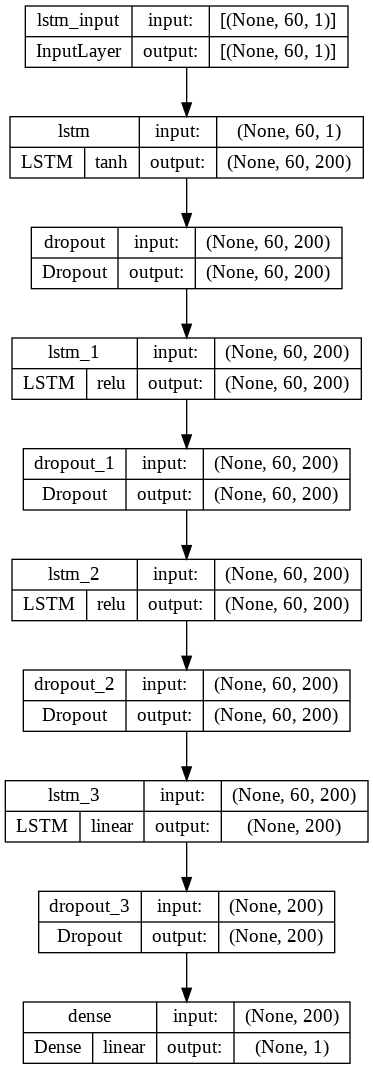

In [ ]:
tf.keras.utils.plot_model(model, 
                          show_shapes = True, 
                          show_dtype = False, 
                          show_layer_names = True, 
                          expand_nested = True, 
                          show_layer_activations = True)

## Fit Model

In [ ]:
hist = model.fit(X_train, y_train, 
                 epochs = 10, 
                 batch_size = 200, 
                 verbose = 2, 
                 validation_data = (X_train, y_train))

Epoch 1/10
19/19 - 64s - loss: 0.0365 - val_loss: 0.0036 - 64s/epoch - 3s/step
Epoch 2/10
19/19 - 55s - loss: 0.0032 - val_loss: 0.0020 - 55s/epoch - 3s/step
Epoch 3/10
19/19 - 54s - loss: 0.0016 - val_loss: 7.7965e-04 - 54s/epoch - 3s/step
Epoch 4/10
19/19 - 56s - loss: 0.0013 - val_loss: 6.2079e-04 - 56s/epoch - 3s/step
Epoch 5/10
19/19 - 55s - loss: 0.0012 - val_loss: 5.2106e-04 - 55s/epoch - 3s/step
Epoch 6/10
19/19 - 55s - loss: 0.0012 - val_loss: 0.0013 - 55s/epoch - 3s/step
Epoch 7/10
19/19 - 57s - loss: 0.0011 - val_loss: 4.8503e-04 - 57s/epoch - 3s/step
Epoch 8/10
19/19 - 56s - loss: 0.0011 - val_loss: 4.1757e-04 - 56s/epoch - 3s/step
Epoch 9/10
19/19 - 56s - loss: 8.9955e-04 - val_loss: 4.2212e-04 - 56s/epoch - 3s/step
Epoch 10/10
19/19 - 55s - loss: 8.4448e-04 - val_loss: 4.4372e-04 - 55s/epoch - 3s/step


## Evaluation Model

In [ ]:
model.metrics_names

['loss']

In [ ]:
score_training = model.evaluate(X_train, y_train, verbose = 1)
print('Training loss :', score_training) 

117/117 [==============================] - 24s 206ms/step - loss: 4.4372e-04
Training loss : 0.0004437172901816666


In [ ]:
score_testing = model.evaluate(X_test, y_test, verbose = 1)
print('Test loss :', score_testing)

20/20 [==============================] - 7s 290ms/step - loss: 12347.2441
Test loss : 12347.244140625


## Visualisasi Training Model Loss

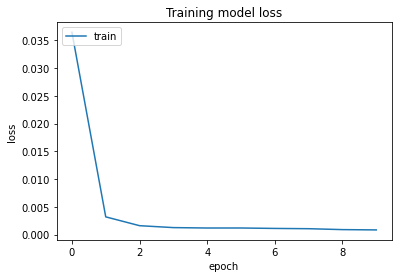

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Save Model LSTM

In [ ]:
model.save("saved_model.h5")

# 5. Prediction Data

In [ ]:
X_pred = model.predict(X_train)
X_pred.shape

117/117 [==============================] - 26s 216ms/step


(3713, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

20/20 [==============================] - 4s 212ms/step


(632, 1)

## Feature Scaling

In [ ]:
X_pred = sc.inverse_transform(X_pred)

In [ ]:
predicted_price = sc.inverse_transform(y_pred)

## Visualisasi hasil prediksi dengan harga aktual

In [ ]:
difference = predicted_price - y_test

In [ ]:
Prediction = pd.DataFrame ({"nilai aktual" : y_test.flatten(), 
                            "nilai prediksi " : predicted_price.flatten(),
                            "Difference " : difference.flatten()})
Prediction

,nilai aktual,nilai prediksi,Difference
0,56.632000,60.367584,3.735584
1,57.436501,59.628563,2.192062
2,56.200001,58.979404,2.779403
3,55.000000,58.419872,3.419872
4,55.735500,57.943577,2.208077
...,...,...,...
627,99.629997,109.574059,9.944062
628,98.099998,108.931351,10.831353
629,99.430000,108.265831,8.835831
630,97.650002,107.583015,9.933013


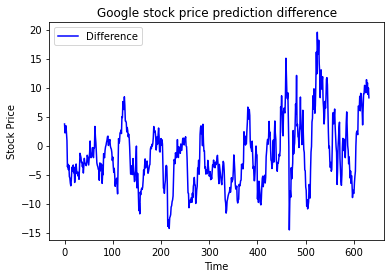

In [ ]:
plt.plot(difference, color = "blue", label = "Difference")
plt.title('Google stock price prediction difference')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.legend()
plt.show()

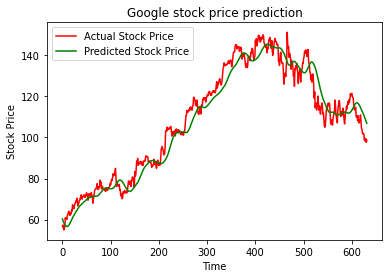

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 6. Result and Conclusion

## RMSE ( Root Mean Squared Error )

In [ ]:
import math
from sklearn.metrics import mean_squared_error

print("Train RMSE : ", math.sqrt(mean_squared_error(y_train, X_pred)))
print("Test RMSE : ", math.sqrt(mean_squared_error(y_test, predicted_price)))

Train RMSE :  88.37950395031082
Test RMSE :  5.768726096543885


## MSE ( Mean Squared Error )

In [ ]:
# MSE Training
MSE_train = np.square(np.subtract(y_train, X_pred)).mean()
print("Train MSE : ", MSE_train)

# MSE Testing
MSE_test = np.square(np.subtract(y_test, predicted_price)).mean()
print("Testing MSE : ", MSE_test)

Train MSE :  7824.458959414658
Testing MSE :  33.27820077694645


## MAE ( Mean Absolute Error )

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

# MAE Training
mae_train = mae(y_train, X_pred)
print("MAE Training : " + str(mae_train))

# MAE Testing
mae_test = mae(y_test, predicted_price)
print("MAE Testing : " + str(mae_test))

MAE Training : 84.68353797679886
MAE Testing : 4.658876999854751
